# 1. READ DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv',index_col=0)
test = pd. read_csv('./data/test.csv',index_col=0)

In [3]:
# pr=test.profile_report()
# pr.to_file('./pr_report.html') # pr_report.html 파일로 저장

In [4]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


- type
- fiberID  
- psfMag_u
- psfMag_g
- psfMag_r
- psfMag_i
- psfMag_z  
- modelMag_u
- modelMag_g
- modelMag_r
- modelMag_i
- modelMag_z


# 2. Check Parameters
- 1. Check Missing and Null Data
- 2. Check mean, min, max
- 3. Check correlation between columns
- 4. Check type(label)
- 5. Check Each Columns 
- 6. Check between type(label) and columns 

1. Check Null Data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 22 columns):
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
dtypes: float64(20), int64(1), object(1)
memory usage: 3

2. Describe

In [6]:
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,...,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,...,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,...,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,...,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,...,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,...,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,...,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,...,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


3. Correlation

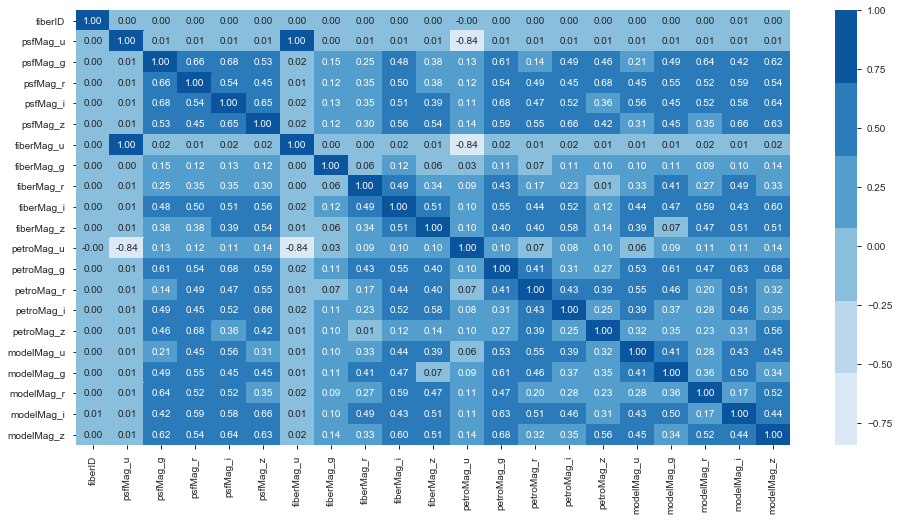

In [7]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr, cmap=cmap, annot=True, fmt = ".2f")

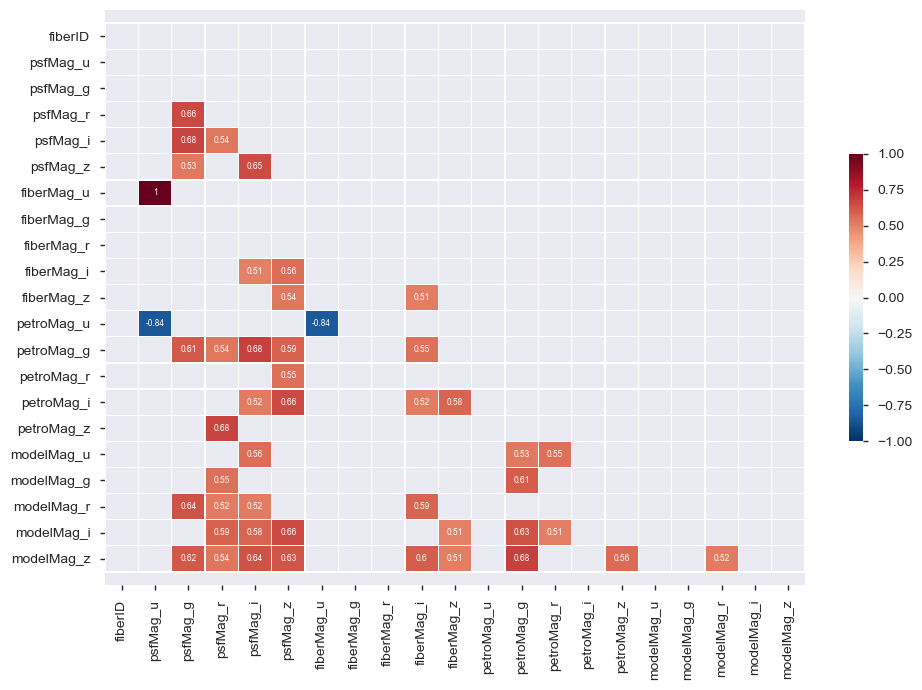

In [9]:
fig, ax = plt.subplots(figsize=(10,7), dpi=100)

data = train.corr()
mask = np.triu(np.ones_like(data, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data[(data >= 0.5) | (data <= -0.5)], 
            mask=mask,
            vmax=1.0, vmin=-1.0, 
            cmap='RdBu_r', linewidths=0.2,
            annot=True, annot_kws={'size': 6}, 
            square=False, cbar=True,
            cbar_kws={'shrink': .5}, ax=ax)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)
fig.tight_layout()
plt.show()

4. Check type(label data)  
Imbalnced category

In [ ]:
train['type'].value_counts()

In [ ]:
fig = plt.figure(figsize=(8,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train['type'].value_counts().plot(kind='bar')
plt.title('type Values in the Training Set - train ()')

In [ ]:
fig, ax = plt.subplots(dpi=100)
train['type'].value_counts(ascending=True).plot(kind='barh', width=0.8, edgecolor='black', ax=ax)
ax.grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

### Check Each Columns

In [ ]:
col = train.columns
fig, axes = plt.subplots(10, 2, figsize=(10,30))

for i, column in enumerate(col):    
    if i>1:
        sns.kdeplot(train[column], shade=True, ax=axes.flat[i-2])
        
fig.tight_layout()
plt.show()

In [ ]:
cols= train.columns
cols[2:7]

In [ ]:
# sns.pairplot(train[cols])

6. Check type and other columns Connection

KeyError: "None of [Index([(21.431953406254802, 20.708103988199, 16.7278979265844, 20.040370991681, 23.0587673158623, 19.315941586511702, 21.1209194437774, 15.786267718713699, 20.773063631318, 18.3154596918432, 17.228673684456002, 18.6838716636346, 19.785866304297198, 19.1126554452698, 19.0041511728707, 20.8209520543145, 19.6764816276324, 19.9260069891469, 20.5688085839457, 20.1921143486524, 15.989207598450598, 17.841138160649606, 18.895626610234306, 20.2660443021486, 18.674142330754, 18.8515290889257, 22.5374945662953, 20.0748312789278, 19.2170514328713, 21.1879751757245, 21.126963413288397, 19.720593842469896, 18.798606106058397, 21.2295535074383, 19.934723761212002, 20.887840303067602, 19.2212180221559, 21.556742336163996, 19.5323030332274, 17.0150601451299, 20.0239300650379, 21.6074235527179, 18.9968105447192, 20.0889901064041, 19.418428235058, 17.4263728850463, 18.907372189125198, 17.3771859924964, 25.555191021824303, 17.681626047431, 19.9188956912731, 21.125461904873603, 21.3412277532092, 21.1791234539437, 16.7192538395433, 24.5138204891914, 20.576785234541603, 18.4574319377458, 19.1837198510411, 16.3991791540524, 19.7374938529446, 21.835875208065602, 16.8454536940386, 19.931198454222, 18.7712866597431, 19.3950770399641, 20.6277303780242, 18.2793252237557, 19.8586078104376, 20.4065332123972, 17.141493983363098, 15.1149395204547, 21.753255044317694, 19.839486946974002, 21.854108793207, 18.4932809176368, 21.5386981425031, 19.0070040104215, 18.341995626514606, 18.0277388368036, 19.0204935658772, 19.0614112938127, 19.3540906813677, 20.209430467462106, 20.7389612496337, 19.9386576011797, 20.376307900230106, 20.1949011048248, 16.6930339284831, 21.931282790226003, 18.5447202347345, 19.6380666733155, 19.8766835687218, 19.371652648770002, 19.355624528143, 19.6285607488207, 20.7180003238558, 17.666726306593898, 21.223893112362894, 21.786027784717497, ...)], dtype='object')] are in the [columns]"

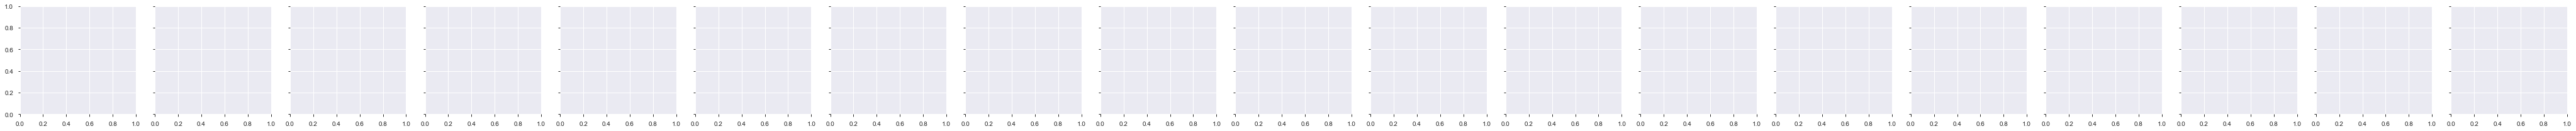

In [14]:
g = sns.FacetGrid(train, col='type')
g.map(plt.hist, train['psfMag_g'], bins=20)

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
columns = train.filter(regex='psf').columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
columns = train.filter(regex='fiberMag').columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
columns = train.filter(regex='petro').columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10,30))
columns = train.filter(regex='model').columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()

### Outlier Check and Plot

In [ ]:
def draw_types(n=6, regex='psf'):
    labels = train['type'].value_counts().index.tolist()[:n]
    columns = train.filter(regex=regex).columns.tolist()
    colors = ['violet', 'green', 'red', 'cyan', 'yellow']
    waves = [column[-1:] for column in columns]

    fig, axes = plt.subplots(int(n/2), 2, figsize=(10,n), dpi=100)
    w = 1.5
    for i, label in enumerate(labels):
        for column, color, wave in zip(columns, colors, waves):
            q1 = train.loc[train['type'] == label, column].quantile(0.25)
            q3 = train.loc[train['type'] == label, column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (w * iqr)
            upper_bound = q3 + (w * iqr)
            
            mask = (train.loc[train['type']==label, column] >= lower_bound) & (train.loc[train['type']==label, column] <= upper_bound)
            
            data = train.loc[train['type'] == label, column].loc[mask]

            sns.distplot(data, hist=False, color=color, kde_kws={'shade': True}, 
                         label=wave, ax=axes.flat[i])

        axes.flat[i].set_title(label)
        axes.flat[i].set_xlabel('')
        axes.flat[i].grid(axis='x', linestyle='--')
        axes.flat[i].legend(frameon=True, framealpha=1, shadow=False, 
                            fancybox=False, edgecolor='black')

    fig.tight_layout()
    plt.show()

In [ ]:
draw_types(n=20, regex='psf')

In [ ]:
draw_types(n=20, regex='fiberMag')

In [ ]:
draw_types(n=20, regex='modelMag')

In [ ]:
draw_types(n=20, regex='petro')

## 3. Feature Engineering

### 3.1 Numerical values
### 3.2 Categorical values
### 3.3 Filling Missing Values
### 3.4 Detect Outlier and Remove
### 3.5 Feature engineering

In [ ]:
id1=train['psfMag_u']<-10
id2=train['psfMag_u']>40.
train2 = train.copy()
train2['psfMag_u'][id1]=-10.
train2['psfMag_u'][id2]=40.

In [ ]:
from sklearn.base import BaseEstimator


class OutOfFold(BaseEstimator):
    def __init__(self, model, n_folds=5):
        self.model = model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        train_preds = np.zeros((len(X), n_class))

        for i, (train_index, valid_index) in enumerate(skf.split(X, y)):
            X_train_data = X[train_index]
            X_valid_data = X[valid_index]
            y_train_data = y[train_index]
            y_valid_data = y[valid_index]

            self.model.fit(X_train_data, y_train_data)

            preds = self.model.predict_proba(X_valid_data)

            train_preds[valid_index] = preds

            score = log_loss(y_valid_data, preds)
            acc = accuracy_score(y_valid_data, np.argmax(preds, axis=1))

            print('{}-fold: logloss = {:.5f} acc = {:.5f}'.format(i+1, score, acc))
        
        return self
   
    def predict(self, X):
        return self.model.predict_proba(X)